In [264]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
data = pd.read_csv("../data/final_dataset.csv")
data.head(10)

/var/folders/jv/pq5dl5md3g3fb3s8kb4ry0gm0000gn/T/ipykernel_52374/1763693028.py:1: DtypeWarning: Columns (7,8,9,10,11,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/final_dataset.csv")


,date,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
0,1854-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1854-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1854-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1854-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1854-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1854-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1854-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1854-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1854-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1854-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
data.dtypes

date               object
Mkt-RF            float64
SMB               float64
HML               float64
RMW               float64
CMA               float64
RF                float64
DGS10              object
RIFSPPFAAD90NB     object
DGS1               object
CBETHUSD           object
DBAA               object
USRECDP           float64
USRECD            float64
DCPN3M             object
DCPF1M             object
DAAA               object
T10Y3M             object
BAMLH0A0HYM2       object
T10YIE             object
DHHNGSP            object
AMERIBOR           object
USRECDM           float64
CBBTCUSD           object
DEXUSUK            object
DCOILWTICO         object
VIXCLS             object
DEXJPUS            object
DEXUSEU            object
T5YIE              object
OBMMIJUMBO30YF     object
NIKKEI225          object
BAMLH0A0HYM2EY     object
DCOILBRENTEU       object
ads_index         float64
open              float64
high              float64
low               float64
close       

In [267]:
data.columns

Index(['date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'DGS10',
       'RIFSPPFAAD90NB', 'DGS1', 'CBETHUSD', 'DBAA', 'USRECDP', 'USRECD',
       'DCPN3M', 'DCPF1M', 'DAAA', 'T10Y3M', 'BAMLH0A0HYM2', 'T10YIE',
       'DHHNGSP', 'AMERIBOR', 'USRECDM', 'CBBTCUSD', 'DEXUSUK', 'DCOILWTICO',
       'VIXCLS', 'DEXJPUS', 'DEXUSEU', 'T5YIE', 'OBMMIJUMBO30YF', 'NIKKEI225',
       'BAMLH0A0HYM2EY', 'DCOILBRENTEU', 'ads_index', 'open', 'high', 'low',
       'close', 'volume', 'dividends', 'stock_splits', 'SP500'],
      dtype='object')

### Changing date to datetime type

In [268]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [269]:
data.dtypes

date              datetime64[ns]
Mkt-RF                   float64
SMB                      float64
HML                      float64
RMW                      float64
CMA                      float64
RF                       float64
DGS10                     object
RIFSPPFAAD90NB            object
DGS1                      object
CBETHUSD                  object
DBAA                      object
USRECDP                  float64
USRECD                   float64
DCPN3M                    object
DCPF1M                    object
DAAA                      object
T10Y3M                    object
BAMLH0A0HYM2              object
T10YIE                    object
DHHNGSP                   object
AMERIBOR                  object
USRECDM                  float64
CBBTCUSD                  object
DEXUSUK                   object
DCOILWTICO                object
VIXCLS                    object
DEXJPUS                   object
DEXUSEU                   object
T5YIE                     object
OBMMIJUMBO

### Converting all object data types to float

In [270]:
def convert_object_to_float(data):

    object_columns = data.select_dtypes(include=['object']).columns
    
    for col in object_columns:
   
        data[col] = pd.to_numeric(df[col], errors='coerce')
        
        print(f"Column converted to float: {col} ")
    
    return data


In [271]:
data = convert_object_to_float(data)

Column converted to float: DGS10 
Column converted to float: RIFSPPFAAD90NB 
Column converted to float: DGS1 
Column converted to float: CBETHUSD 
Column converted to float: DBAA 
Column converted to float: DCPN3M 
Column converted to float: DCPF1M 
Column converted to float: DAAA 
Column converted to float: T10Y3M 
Column converted to float: BAMLH0A0HYM2 
Column converted to float: T10YIE 
Column converted to float: DHHNGSP 
Column converted to float: AMERIBOR 
Column converted to float: CBBTCUSD 
Column converted to float: DEXUSUK 
Column converted to float: DCOILWTICO 
Column converted to float: VIXCLS 
Column converted to float: DEXJPUS 
Column converted to float: DEXUSEU 
Column converted to float: T5YIE 
Column converted to float: OBMMIJUMBO30YF 
Column converted to float: NIKKEI225 
Column converted to float: BAMLH0A0HYM2EY 
Column converted to float: DCOILBRENTEU 


### Code to get previous 'x' years of data from current date

In [272]:
def last_x_years_data(data,x):

    current_date = datetime.now()
    cutoff_date = current_date - pd.DateOffset(years=x)

    new_data = data[data['date'] >= cutoff_date]
    
    return new_data

In [273]:
df = data.copy()

In [274]:
new_df = last_x_years_data(df,4)
new_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
60597,2020-10-28,-3.41,0.17,0.59,-0.45,-0.02,0.0,0.79,NaN,0.12,...,37.86,0.632792,112.432007,112.803357,108.571886,108.669609,143937800.0,0.0,0.0,3271.03
60598,2020-10-29,1.13,0.15,0.25,0.29,0.61,0.0,0.85,NaN,0.12,...,36.56,0.605256,109.813008,114.269242,109.646870,112.695877,146129200.0,0.0,0.0,3310.11
60599,2020-10-30,-1.45,-0.23,1.85,0.24,-0.07,0.0,0.88,0.13,0.13,...,36.33,0.577425,108.532801,109.441639,105.268807,106.382866,190272600.0,0.0,0.0,3269.96
60600,2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.549290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60601,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.520837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing weekend data as no stock trading occurs on these days

In [275]:
def remove_weekends(df):
    
    # Removing weekends (Saturday = 5, Sunday = 6)
    df = df[~df['date'].dt.weekday.isin([5, 6])]
    
    return df

In [276]:
new_df = remove_weekends(new_df)
new_df.head()

,date,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
60597,2020-10-28,-3.41,0.17,0.59,-0.45,-0.02,0.0,0.79,NaN,0.12,...,37.86,0.632792,112.432007,112.803357,108.571886,108.669609,143937800.0,0.0,0.0,3271.03
60598,2020-10-29,1.13,0.15,0.25,0.29,0.61,0.0,0.85,NaN,0.12,...,36.56,0.605256,109.813008,114.269242,109.646870,112.695877,146129200.0,0.0,0.0,3310.11
60599,2020-10-30,-1.45,-0.23,1.85,0.24,-0.07,0.0,0.88,0.13,0.13,...,36.33,0.577425,108.532801,109.441639,105.268807,106.382866,190272600.0,0.0,0.0,3269.96
60602,2020-11-02,1.17,0.87,0.99,0.41,0.40,0.0,0.87,0.15,0.13,...,37.78,0.491822,106.627181,108.161455,104.877912,106.294914,122866900.0,0.0,0.0,3310.24
60603,2020-11-03,1.93,1.01,-0.18,-0.20,0.00,0.0,0.90,0.17,0.14,...,38.17,0.462233,107.164668,108.953021,106.255830,107.926918,107624400.0,0.0,0.0,3369.16


In [277]:
new_df.shape

(1043, 43)

### Filling missing values

In [278]:
new_df.isnull().sum()

date                0
Mkt-RF             77
SMB                77
HML                77
RMW                77
CMA                77
RF                 77
DGS10              48
RIFSPPFAAD90NB    380
DGS1               48
CBETHUSD            4
DBAA               48
USRECDP             5
USRECD              5
DCPN3M            578
DCPF1M            598
DAAA               48
T10Y3M             47
BAMLH0A0HYM2       15
T10YIE             47
DHHNGSP            51
AMERIBOR            4
USRECDM             5
CBBTCUSD            4
DEXUSUK            51
DCOILWTICO         50
VIXCLS             24
DEXJPUS            51
DEXUSEU            51
T5YIE              47
OBMMIJUMBO30YF     50
NIKKEI225          67
BAMLH0A0HYM2EY     15
DCOILBRENTEU       40
ads_index          10
open               38
high               38
low                38
close              38
volume             38
dividends          38
stock_splits       38
SP500              43
dtype: int64

In [279]:
def fill_missing_values(df):

    df.fillna(method='ffill', inplace=True)
    
    return df


In [280]:
new_df = fill_missing_values(new_df)
new_df.head()

/var/folders/jv/pq5dl5md3g3fb3s8kb4ry0gm0000gn/T/ipykernel_52374/715002940.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,date,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
60597,2020-10-28,-3.41,0.17,0.59,-0.45,-0.02,0.0,0.79,NaN,0.12,...,37.86,0.632792,112.432007,112.803357,108.571886,108.669609,143937800.0,0.0,0.0,3271.03
60598,2020-10-29,1.13,0.15,0.25,0.29,0.61,0.0,0.85,NaN,0.12,...,36.56,0.605256,109.813008,114.269242,109.646870,112.695877,146129200.0,0.0,0.0,3310.11
60599,2020-10-30,-1.45,-0.23,1.85,0.24,-0.07,0.0,0.88,0.13,0.13,...,36.33,0.577425,108.532801,109.441639,105.268807,106.382866,190272600.0,0.0,0.0,3269.96
60602,2020-11-02,1.17,0.87,0.99,0.41,0.40,0.0,0.87,0.15,0.13,...,37.78,0.491822,106.627181,108.161455,104.877912,106.294914,122866900.0,0.0,0.0,3310.24
60603,2020-11-03,1.93,1.01,-0.18,-0.20,0.00,0.0,0.90,0.17,0.14,...,38.17,0.462233,107.164668,108.953021,106.255830,107.926918,107624400.0,0.0,0.0,3369.16


In [281]:
new_df.isnull().sum()

date              0
Mkt-RF            0
SMB               0
HML               0
RMW               0
CMA               0
RF                0
DGS10             0
RIFSPPFAAD90NB    2
DGS1              0
CBETHUSD          0
DBAA              0
USRECDP           0
USRECD            0
DCPN3M            0
DCPF1M            0
DAAA              0
T10Y3M            0
BAMLH0A0HYM2      0
T10YIE            0
DHHNGSP           0
AMERIBOR          0
USRECDM           0
CBBTCUSD          0
DEXUSUK           0
DCOILWTICO        0
VIXCLS            0
DEXJPUS           0
DEXUSEU           0
T5YIE             0
OBMMIJUMBO30YF    0
NIKKEI225         0
BAMLH0A0HYM2EY    0
DCOILBRENTEU      0
ads_index         0
open              0
high              0
low               0
close             0
volume            0
dividends         0
stock_splits      0
SP500             0
dtype: int64

### Time series plot for the yfinance variables to observe any trend or anomalies

In [282]:

def plot_yfinance_time_series(df):
    
    df.set_index('date', inplace=True)

    yfinance_columns = ['open', 'high', 'low', 'close', 'volume'] 

    # Filtering to include only yfinance columns
    yfinance_data = df[yfinance_columns]

    num_rows = yfinance_data.shape[1]

    fig, axs = plt.subplots(num_rows, 1, figsize=(15, 5 * num_rows))
    axs = axs.flatten()

    for i, column in enumerate(yfinance_data.columns):
        axs[i].plot(yfinance_data.index, yfinance_data[column], label=column)
        axs[i].set_title(column)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(column)
        axs[i].legend()

    plt.tight_layout()
    plt.show()


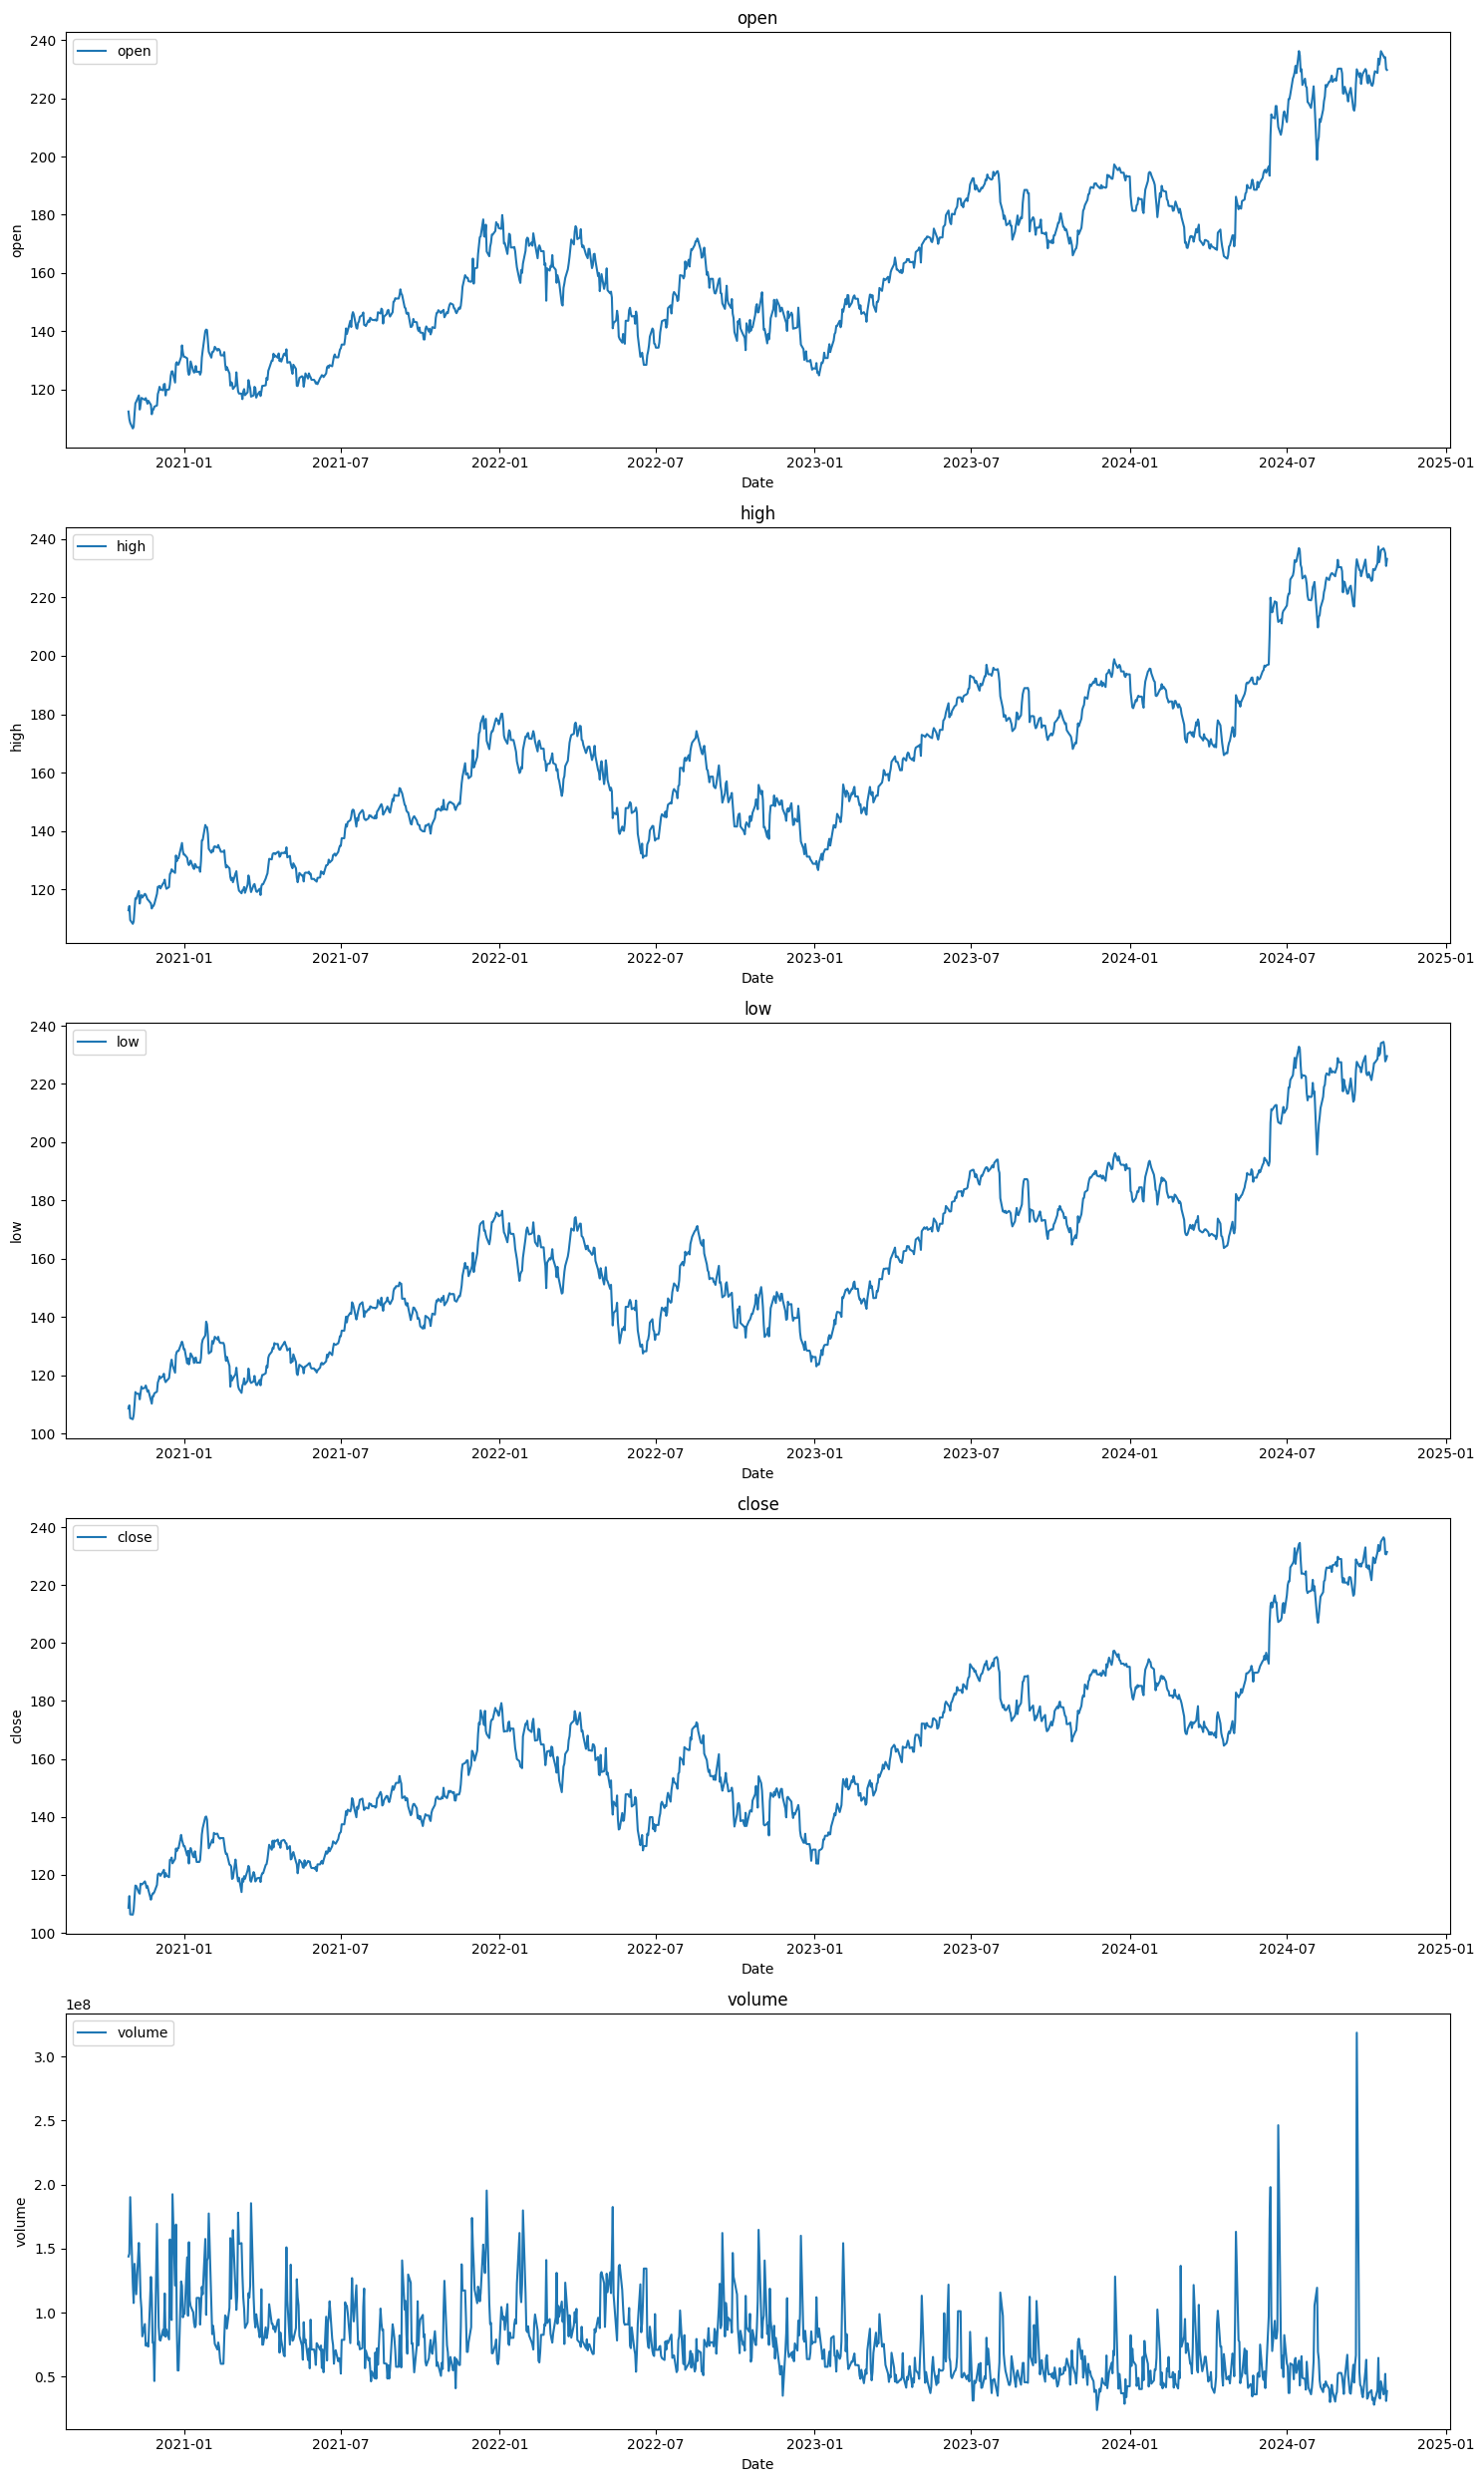

In [283]:
plot_yfinance_time_series(new_df)

In [284]:
new_df.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,RIFSPPFAAD90NB,DGS1,CBETHUSD,...,DCOILBRENTEU,ads_index,open,high,low,close,volume,dividends,stock_splits,SP500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1041.000000,1043.000000,1043.000000,...,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.0,1043.000000
mean,0.090968,-0.027229,0.034669,0.022608,0.005570,0.010582,2.985733,2.955764,2.981486,2279.556788,...,82.377402,0.019466,161.970567,163.690151,160.363039,162.106953,7.618685e+07,0.003519,0.0,4415.821553
std,1.088716,0.759477,1.018370,0.663347,0.596723,0.009506,1.229340,2.308612,2.181530,926.619493,...,16.000687,0.490094,29.046314,29.121768,28.916505,29.044295,3.076758e+07,0.028253,0.0,551.945523
min,-4.290000,-2.950000,-4.970000,-2.180000,-2.740000,0.000000,0.780000,0.040000,0.040000,382.660000,...,36.330000,-1.433420,106.627181,108.161455,104.877912,106.294914,2.404830e+07,0.000000,0.0,3269.960000
25%,-0.490000,-0.555000,-0.560000,-0.380000,-0.320000,0.000000,1.630000,0.150000,0.140000,1630.295000,...,74.305000,-0.289950,140.868074,142.200614,139.055708,140.842415,5.389585e+07,0.000000,0.0,3992.470000
50%,0.090000,-0.040000,0.020000,-0.020000,-0.030000,0.011000,3.460000,4.190000,4.140000,2054.060000,...,81.940000,-0.035227,159.961656,161.918521,157.554322,159.968292,7.043370e+07,0.000000,0.0,4345.720000
75%,0.805000,0.425000,0.610000,0.435000,0.390000,0.021000,4.045000,5.240000,4.980000,2985.875000,...,88.975000,0.251565,179.443285,180.814758,177.327604,179.341034,9.054130e+07,0.000000,0.0,4673.660000
max,5.680000,4.210000,6.730000,4.210000,2.520000,0.022000,4.980000,5.540000,5.490000,4805.950000,...,133.180000,1.890520,236.206595,237.490005,234.449997,236.479996,3.186799e+08,0.250000,0.0,5864.670000


### Checking for correlation amongst variables

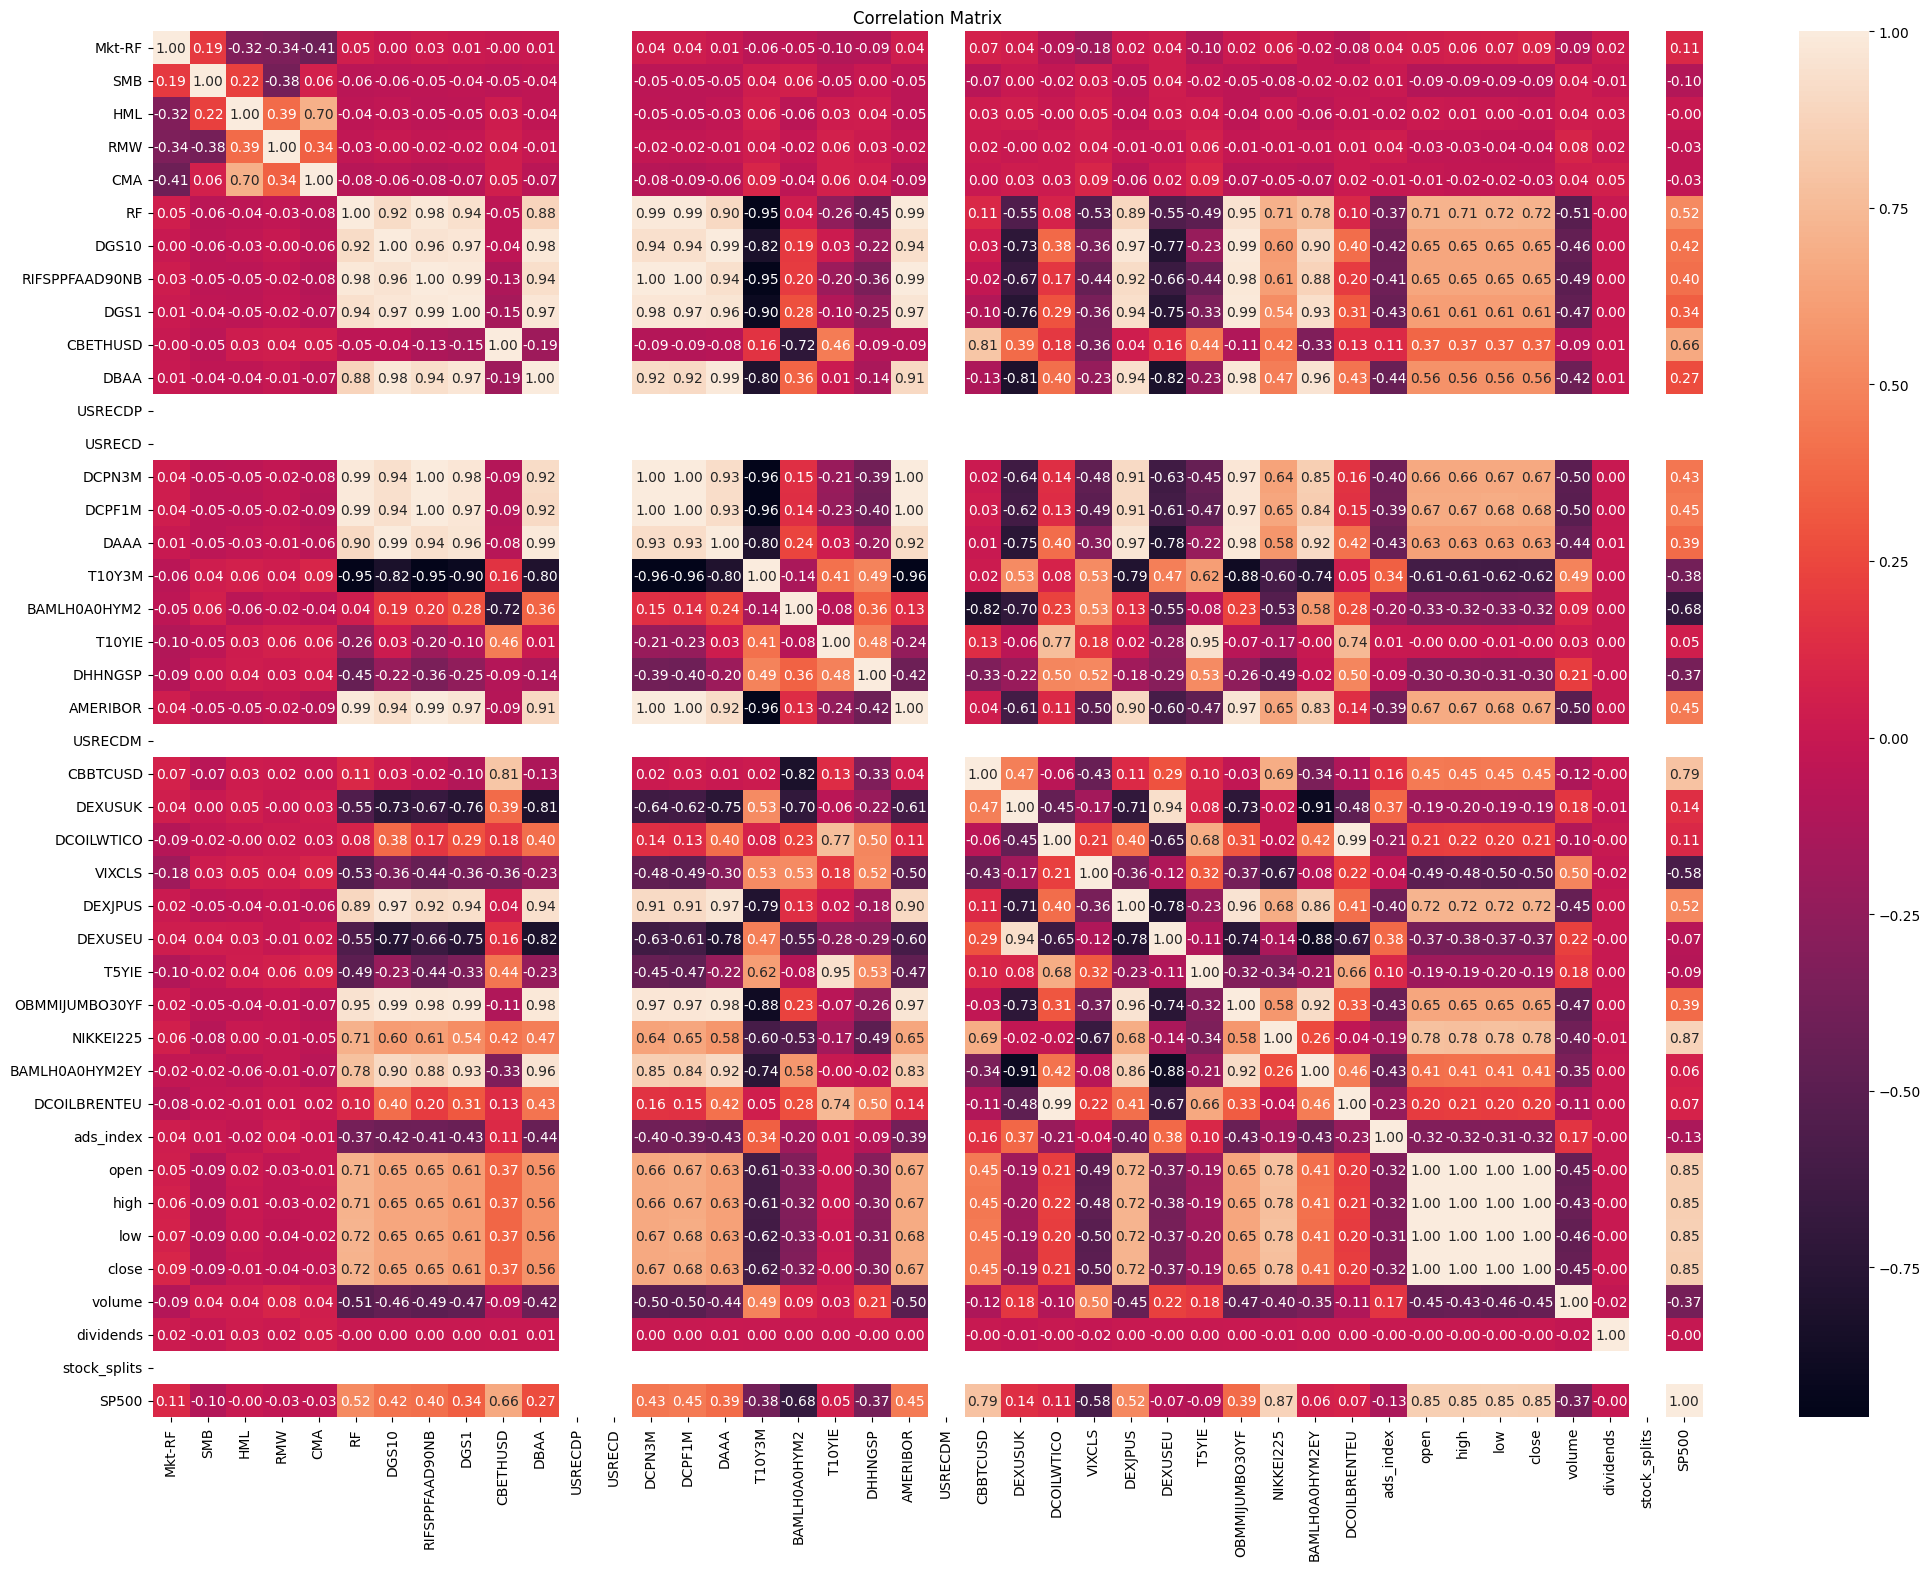

In [285]:
plt.figure(figsize=(25,18))
sns.heatmap(new_df.corr(),annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [286]:
new_df[['USRECDP','USRECD']]

,USRECDP,USRECD
date,,
2020-10-28,0.0,0.0
2020-10-29,0.0,0.0
2020-10-30,0.0,0.0
2020-11-02,0.0,0.0
2020-11-03,0.0,0.0
...,...,...
2024-10-21,0.0,0.0
2024-10-22,0.0,0.0
2024-10-23,0.0,0.0


In [287]:
def removing_correlated_variables(df):

    df_corr = df.corr()

    #Removing variables with NaN correlation with every other variable (0 value)
    NaN_columns = [col for col in df_corr.columns if df_corr[col].isna().all()]
    df__withoutNaN = df.drop(columns=NaN_columns)
    print("NaN correlation/ 0 valued columns dropped: ", NaN_columns)

    corr_matrix_cleaned = df__withoutNaN.corr()

    columns_to_drop = set()

    for i in range(len(corr_matrix_cleaned.columns)):
        for j in range(i):
            if abs(corr_matrix_cleaned.iloc[i, j]) >= 0.95: 
                colname = corr_matrix_cleaned.columns[i] 

                if colname not in ['open','high','low','close','volume']:
                    columns_to_drop.add(colname)

    # Dropping the highly correlated columns (excluding yfinance columns)
    df_final = df__withoutNaN.drop(columns=columns_to_drop)
    print("Columns dropped: ",columns_to_drop)
    
    return df_final

In [288]:
new_ddf = removing_correlated_variables(new_df)
new_ddf.head()

NaN correlation/ 0 valued columns dropped:  ['USRECDP', 'USRECD', 'USRECDM', 'stock_splits']
Columns dropped:  {'DCPF1M', 'DBAA', 'T10Y3M', 'DCOILBRENTEU', 'BAMLH0A0HYM2EY', 'DGS1', 'OBMMIJUMBO30YF', 'AMERIBOR', 'DEXJPUS', 'RIFSPPFAAD90NB', 'DCPN3M', 'DAAA'}


,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,CBETHUSD,BAMLH0A0HYM2,T10YIE,...,T5YIE,NIKKEI225,ads_index,open,high,low,close,volume,dividends,SP500
date,,,,,,,,,,,,,,,,,,,,,
2020-10-28,-3.41,0.17,0.59,-0.45,-0.02,0.0,0.79,388.83,5.29,1.70,...,1.61,23418.51,0.632792,112.432007,112.803357,108.571886,108.669609,143937800.0,0.0,3271.03
2020-10-29,1.13,0.15,0.25,0.29,0.61,0.0,0.85,387.63,5.25,1.71,...,1.61,23331.94,0.605256,109.813008,114.269242,109.646870,112.695877,146129200.0,0.0,3310.11
2020-10-30,-1.45,-0.23,1.85,0.24,-0.07,0.0,0.88,382.66,5.25,1.70,...,1.59,22977.13,0.577425,108.532801,109.441639,105.268807,106.382866,190272600.0,0.0,3269.96
2020-11-02,1.17,0.87,0.99,0.41,0.40,0.0,0.87,383.22,5.25,1.71,...,1.60,23295.48,0.491822,106.627181,108.161455,104.877912,106.294914,122866900.0,0.0,3310.24
2020-11-03,1.93,1.01,-0.18,-0.20,0.00,0.0,0.90,388.63,5.07,1.72,...,1.62,23295.48,0.462233,107.164668,108.953021,106.255830,107.926918,107624400.0,0.0,3369.16


In [289]:
new_ddf.corr()

,Mkt-RF,SMB,HML,RMW,CMA,RF,DGS10,CBETHUSD,BAMLH0A0HYM2,T10YIE,...,T5YIE,NIKKEI225,ads_index,open,high,low,close,volume,dividends,SP500
Mkt-RF,1.000000,0.189947,-0.319489,-0.337908,-0.413510,0.048744,0.004933,-0.001385,-0.047183,-0.097350,...,-0.101964,0.056386,0.035404,0.045868,0.060165,0.066695,0.090287,-0.090669,0.024675,0.108989
SMB,0.189947,1.000000,0.220450,-0.379287,0.064388,-0.060511,-0.057223,-0.054828,0.056634,-0.046895,...,-0.024322,-0.075758,0.006892,-0.088968,-0.091283,-0.089798,-0.089866,0.035992,-0.005842,-0.100067
HML,-0.319489,0.220450,1.000000,0.394085,0.695228,-0.043021,-0.034889,0.032710,-0.063408,0.029491,...,0.038390,0.004266,-0.021713,0.018373,0.006557,0.003244,-0.010187,0.035377,0.033373,-0.002669
RMW,-0.337908,-0.379287,0.394085,1.000000,0.344433,-0.028532,-0.003481,0.042711,-0.018341,0.062123,...,0.062400,-0.010444,0.039715,-0.030625,-0.033060,-0.037440,-0.042176,0.081728,0.015784,-0.028309
CMA,-0.413510,0.064388,0.695228,0.344433,1.000000,-0.076971,-0.062395,0.045271,-0.044198,0.060702,...,0.089205,-0.047439,-0.006645,-0.011537,-0.019924,-0.022814,-0.033184,0.042837,0.050421,-0.032413
RF,0.048744,-0.060511,-0.043021,-0.028532,-0.076971,1.000000,0.922779,-0.046816,0.040793,-0.256272,...,-0.493027,0.705448,-0.374449,0.714941,0.713628,0.718079,0.715767,-0.511644,-0.000664,0.519176
DGS10,0.004933,-0.057223,-0.034889,-0.003481,-0.062395,0.922779,1.000000,-0.043187,0.187973,0.025136,...,-0.226516,0.601664,-0.415718,0.648303,0.649520,0.649201,0.648946,-0.461494,0.001770,0.422381
CBETHUSD,-0.001385,-0.054828,0.032710,0.042711,0.045271,-0.046816,-0.043187,1.000000,-0.718482,0.457926,...,0.435457,0.421054,0.112477,0.365581,0.365342,0.367697,0.365813,-0.093327,0.009242,0.662940
BAMLH0A0HYM2,-0.047183,0.056634,-0.063408,-0.018341,-0.044198,0.040793,0.187973,-0.718482,1.000000,-0.075507,...,-0.075659,-0.533309,-0.195788,-0.325141,-0.319461,-0.327873,-0.321958,0.092355,0.003031,-0.684306
T10YIE,-0.097350,-0.046895,0.029491,0.062123,0.060702,-0.256272,0.025136,0.457926,-0.075507,1.000000,...,0.946264,-0.169734,0.005122,-0.003471,0.000390,-0.006080,-0.003990,0.026625,0.000835,0.047887
